<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/Analyzing_the_ArchibusBuildingDetails_of_Uottawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/saj')

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [53]:
import pandas as pd

In [68]:
df = pd.read_excel('/content/saj/MyDrive/uni kavgic/electricUottawa/ArchibusBuildingDetails.xlsx')

In [59]:
import pandas as pd

# Group by column 'A'
grouped = df.groupby('Building Use')

# Group by column 'A' and get the size of each group
group_sizes = df.groupby('Building Use').size()

# Create a dictionary to store each group
group_dict = {group_name: group_data for group_name, group_data in grouped}

for i in group_dict:
  print("the Buildings are classefied as: "+ i)

the Buildings are classefied as: ACADEMIC
the Buildings are classefied as: ANCILLARY
the Buildings are classefied as: RESIDENCE
the Buildings are classefied as: UNKNOWN


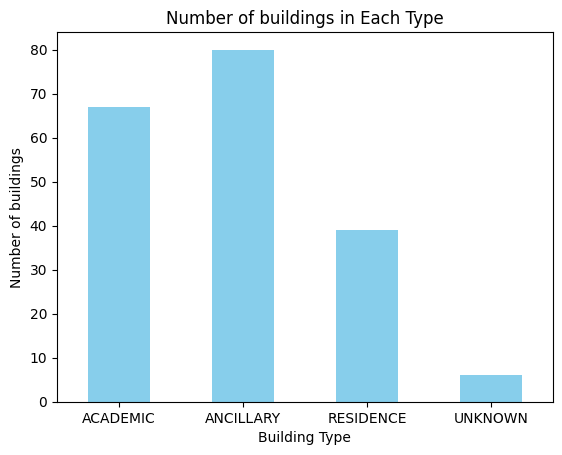

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the bar chart
group_sizes.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Building Type')
plt.ylabel('Number of buildings')
plt.title('Number of buildings in Each Type')
plt.show()

# We are concerned on academic and residential buildings

# Aademic Buildings

In [62]:
# Accessing a specific group
group_Academic = group_dict['ACADEMIC']
group_Academic.head(2)

,Building Code,Account Code,Address 1,Address 2,Ext. Gross Area m²,Int. Gross Area m²,Total Lease Negotiated Area m²,Remaining Area m²,COU Gross Area m²,Total Room Area m²,...,Date Built,Status,Province,Campus ID,Property Code,Building Name,Region Code,Postal Code,Building Use,Structure Type
0,001,NaN,133-135 Séraphin Marion,NaN,0,3582.78,0.0,667.70,3582.78,2915.08,...,1901-01-01 00:00:00,Owned,ON,C01,ZONE 01,Salle académique / Academic Hall (SMN),EASTERN,K1N 6N5,ACADEMIC,Undefined
1,002,NaN,115 Séraphin Marion,NaN,0,1599.42,0.0,259.36,1599.42,1340.06,...,1931-01-01 00:00:00,Owned,ON,C01,ZONE 01,Pavillon Hagen Hall (HGN),EASTERN,K1N 6N5,ACADEMIC,Undefined


In [63]:
# Convert the 'date' column to a datetime object
group_Academic['Date Built'] = pd.to_datetime(group_Academic['Date Built'])

In [69]:
# Define the decade intervals
decade_intervals = pd.cut(group_Academic['Date Built'].dt.year, bins=[1880, 1900, 1920, 1940])

# Group by the decade intervals
grouped = df.groupby(decade_intervals)

# If you want to see the count of items in each group, you can use the following:
group_sizes = grouped.size()



Number of items in each decade group:
Date Built
(1800, 1850]     0
(1850, 1900]     8
(1900, 1950]    24
(1950, 1980]    19
(1980, 2020]    15
dtype: int64


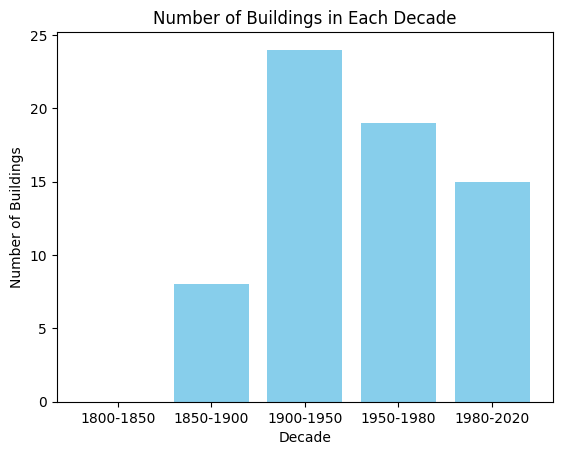

In [70]:
# Convert the 'Date Built' column to a datetime object
group_Academic['Date Built'] = pd.to_datetime(group_Academic['Date Built'])

# Define the decade intervals
decade_intervals = pd.cut(group_Academic['Date Built'].dt.year, bins=[1800, 1850, 1900,1950,1980,2020])

# Group by the decade intervals
grouped = group_Academic.groupby(decade_intervals)

# Print the count of items in each decade group
group_sizes = grouped.size()
print("Number of items in each decade group:")
print(group_sizes)

# Plotting the bar chart with customizations
ax = group_sizes.plot(kind='bar', color='skyblue', width=0.8, rot=90)
ax.set_xticklabels([f"{interval.left}-{interval.right}" for interval in group_sizes.index], rotation=0)
plt.xlabel('Decade')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings in Each Decade')
plt.show()

Number of items in each decade group:
Int. Gross Area m²
(500, 1000]     5
(1000, 1500]    5
(1500, 2000]    1
(2000, 2500]    2
(2500, 3000]    0
dtype: int64


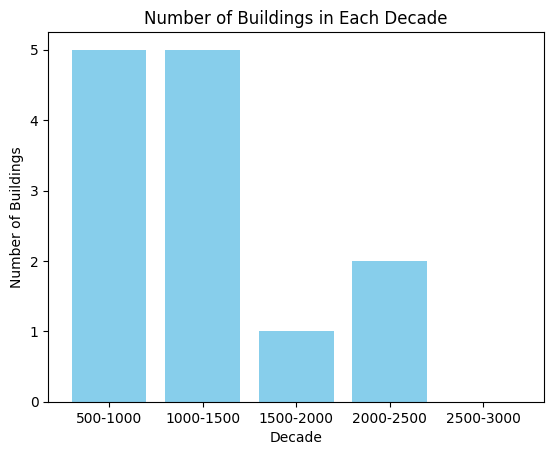

In [71]:


# Define the decade intervals
Area_intervals = pd.cut(group_Academic['Int. Gross Area m²'], bins=[500, 1000, 1500,2000,2500,3000])

# Group by the decade intervals
grouped = group_Academic.groupby(Area_intervals)

# Print the count of items in each decade group
group_sizes = grouped.size()
print("Number of items in each decade group:")
print(group_sizes)

# Plotting the bar chart with customizations
ax = group_sizes.plot(kind='bar', color='skyblue', width=0.8, rot=90)
ax.set_xticklabels([f"{interval.left}-{interval.right}" for interval in group_sizes.index], rotation=0)
plt.xlabel('Decade')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings in Each Decade')
plt.show()

# Residential building

In [72]:
# Accessing a specific group
group_Academic = group_dict['RESIDENCE']
group_Academic.head(2)

,Building Code,Account Code,Address 1,Address 2,Ext. Gross Area m²,Int. Gross Area m²,Total Lease Negotiated Area m²,Remaining Area m²,COU Gross Area m²,Total Room Area m²,...,Date Built,Status,Province,Campus ID,Property Code,Building Name,Region Code,Postal Code,Building Use,Structure Type
9,010,NaN,45 University,"35 University, 25 Copernicus",0,12300.40,0.0,1712.88,12300.40,10587.52,...,1972-01-01 00:00:00,Owned,ON,C01,ZONE 04,Résidence Thompson Residence (THN),EASTERN,K1N 9B1,RESIDENCE,Undefined
12,013,NaN,90 University,NaN,0,25216.07,0.0,3440.29,25216.07,21775.78,...,2001-01-01 00:00:00,Owned,ON,C01,ZONE 04,Complexe Résidentiel / Residential Complex (RCR),EASTERN,K1N 1H3,RESIDENCE,Undefined


In [73]:
# Convert the 'date' column to a datetime object
group_Academic['Date Built'] = pd.to_datetime(group_Academic['Date Built'])

In [74]:
# Define the decade intervals
decade_intervals = pd.cut(group_Academic['Date Built'].dt.year, bins=[1880, 1900, 1920, 1940])

# Group by the decade intervals
grouped = df.groupby(decade_intervals)

# If you want to see the count of items in each group, you can use the following:
group_sizes = grouped.size()



Number of items in each decade group:
Date Built
(1800, 1850]     0
(1850, 1900]     4
(1900, 1950]    24
(1950, 1980]     4
(1980, 2020]     6
dtype: int64


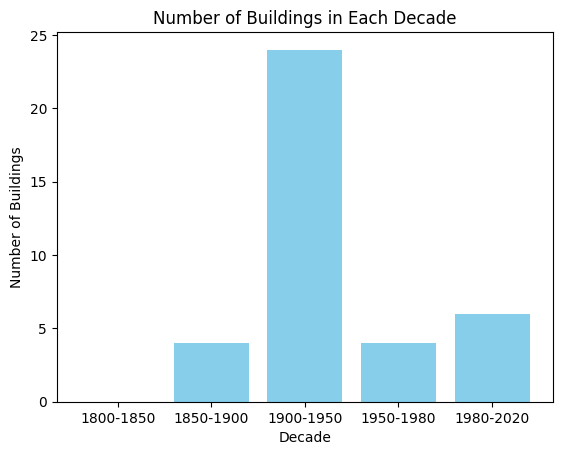

In [75]:
# Convert the 'Date Built' column to a datetime object
group_Academic['Date Built'] = pd.to_datetime(group_Academic['Date Built'])

# Define the decade intervals
decade_intervals = pd.cut(group_Academic['Date Built'].dt.year, bins=[1800, 1850, 1900,1950,1980,2020])

# Group by the decade intervals
grouped = group_Academic.groupby(decade_intervals)

# Print the count of items in each decade group
group_sizes = grouped.size()
print("Number of items in each decade group:")
print(group_sizes)

# Plotting the bar chart with customizations
ax = group_sizes.plot(kind='bar', color='skyblue', width=0.8, rot=90)
ax.set_xticklabels([f"{interval.left}-{interval.right}" for interval in group_sizes.index], rotation=0)
plt.xlabel('Decade')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings in Each Decade')
plt.show()

Number of items in each decade group:
Int. Gross Area m²
(50, 100]      0
(100, 150]     6
(150, 200]     5
(200, 250]    10
(250, 300]     5
dtype: int64


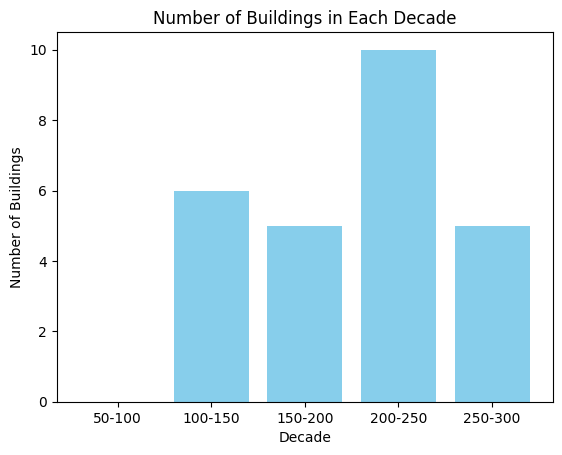

In [78]:


# Define the decade intervals
Area_intervals = pd.cut(group_Academic['Int. Gross Area m²'], bins=[50, 100, 150,200,250,300])

# Group by the decade intervals
grouped = group_Academic.groupby(Area_intervals)

# Print the count of items in each decade group
group_sizes = grouped.size()
print("Number of items in each decade group:")
print(group_sizes)

# Plotting the bar chart with customizations
ax = group_sizes.plot(kind='bar', color='skyblue', width=0.8, rot=90)
ax.set_xticklabels([f"{interval.left}-{interval.right}" for interval in group_sizes.index], rotation=0)
plt.xlabel('Decade')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings in Each Decade')
plt.show()